# Project Python Foundations: FoodHub Data Analysis

## Google Colab or Jupyter notebook
### Aug 2024

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [195]:
# Installing the libraries with the specified version.
# This notebook was created and run within Google Colab Pro.
# Library installation is not needed and commented out.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [196]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration,
# as well as scientific graphing libraries for Python
import plotly.express as px

### Understanding the structure of the data

In [197]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
# Write your code here to read the data
# Read the data from Google Colab Drive mount location
# File location /content/drive/MyDrive/Colab Notebooks/Python Foundations/foodhub_order.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Foundations/foodhub_order.csv')

In [199]:
# Write your code here to view the first 5 rows
# data.head() call shows the first five (5) rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [200]:
# Write your code here
# Get the number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:
- The data shows:
- ROWS at one thousand eight hundred and ninety eight (1898)
- COLUMNS at nine (9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [201]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- int64: delivery_time, food_preparation_time, customer_id (4 columns)
- float64: cost_of_the_order (1 column)
- object(string): restaurant_name, day_of_week, rating, cusine_type (4 columns)
- Total nine (9) columns.
- There are no "missing" or "null" values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [202]:
# Write your code here
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no "missing" or "null" values.
Also shown in Question #2


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [203]:
# Write your code here
# Displaying the statistical summary of the dataset
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [204]:
# Extracting the minimum, average, and maximum values for food preparation time
# Line of code added for min, avg, and max prep times
# Extract the statistics:
min_prep_time = df['food_preparation_time'].min()
avg_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

# Print the results:
print(f"Minimum prep time: {min_prep_time}")
print(f"Average prep time: {avg_prep_time}")
print(f"Maximum prep time: {max_prep_time}")

# Describe the detailed statistics:
df.describe().loc[['min', 'mean', 'max'], 'food_preparation_time'].to_frame().round(0)

Minimum prep time: 20
Average prep time: 27.371970495258168
Maximum prep time: 35


,food_preparation_time
min,20.0
mean,27.0
max,35.0


#### Observations:
The minimum, average and maximum preparation times are shown rounded to the nearest integer.

### **Question 5:** How many orders are not rated? [1 mark]

In [205]:
# Write the code here
# Checking how many orders do not have a rating (assuming non-rated orders have missing or specific values like 'NaN' or empty strings)
# Checking how many orders do not have a rating (assuming non-rated orders have missing or specific values like 'NaN' or empty strings)
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
Data 'rating' Not given shows: 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

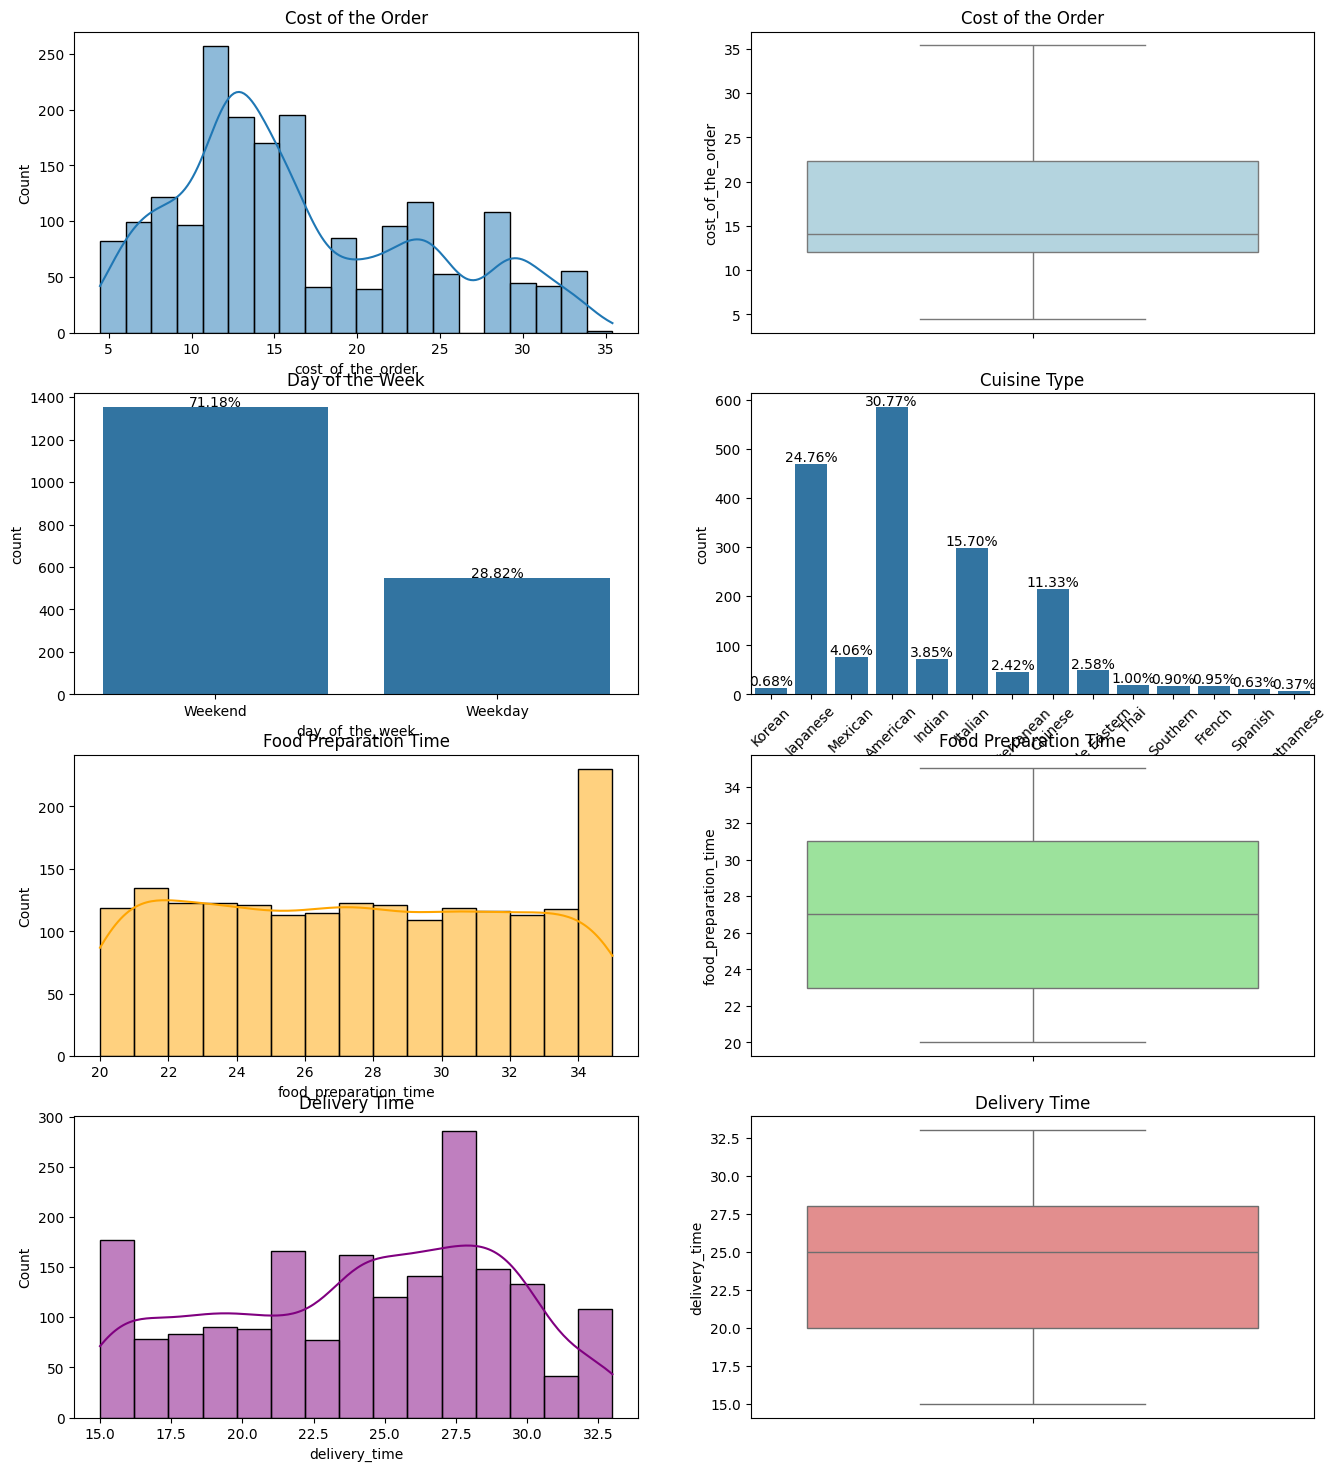

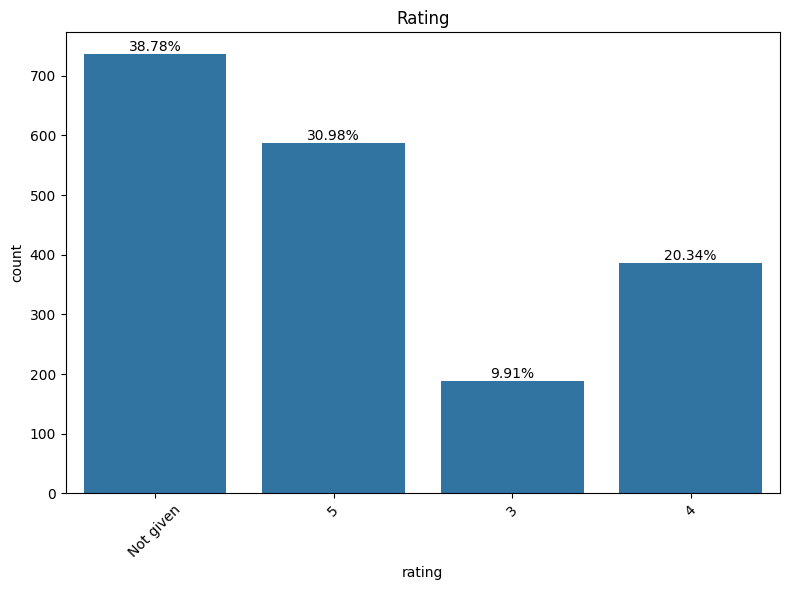

In [206]:
# Write the code here

# Univariate Analysis
# Creating univariate analysis using histograms, countplots, and boxplots where relevant
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

# 1. Cost of the Order
# Histogram
sns.histplot(df['cost_of_the_order'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Cost of the Order')
# Boxplot
sns.boxplot(df['cost_of_the_order'], ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('Cost of the Order')

# 2. Day of the Week
# Countplot
day_of_week_counts = df['day_of_the_week'].value_counts(normalize=True) * 100
ax2 = sns.countplot(x='day_of_the_week', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Day of the Week')
# Percentages
for p in ax2.patches:
    height = p.get_height()
    ax2.text(
        p.get_x() + p.get_width() / 2.,
        height + 5,
        f'{(height / df.shape[0]) * 100:.2f}%',
        ha="center"
    )

# 3. Cuisine Type
# Countplot
cuisine_counts = df['cuisine_type'].value_counts(normalize=True) * 100
ax3 = sns.countplot(x='cuisine_type', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Cuisine Type')
axes[1, 1].tick_params(axis='x', rotation=45)
# Percentages
for p in ax3.patches:
    height = p.get_height()
    ax3.text(
        p.get_x() + p.get_width() / 2.,
        height + 5,
        f'{(height / df.shape[0]) * 100:.2f}%',
        ha="center"
    )

# 4. Food Preparation Time
# Histogram
sns.histplot(df['food_preparation_time'], kde=True, bins=15, ax=axes[2, 0], color='orange')
axes[2, 0].set_title('Food Preparation Time')
# Boxplot
sns.boxplot(df['food_preparation_time'], ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title('Food Preparation Time')

# 5. Delivery Time
# Histogram
sns.histplot(df['delivery_time'], kde=True, bins=15, ax=axes[3, 0], color='purple')
axes[3, 0].set_title('Delivery Time')
# Boxplot
sns.boxplot(df['delivery_time'], ax=axes[3, 1], color='lightcoral')
axes[3, 1].set_title('Delivery Time')

# 6. Rating
# Countplot
fig_rating, ax_rating = plt.subplots(figsize=(8, 6))
sns.countplot(x='rating', data=df, ax=ax_rating)
ax_rating.set_title('Rating')
ax_rating.tick_params(axis='x', rotation=45)
# Percentages
for p in ax_rating.patches:
    height = p.get_height()
    ax_rating.text(
        p.get_x() + p.get_width() / 2.,
        height + 5,
        f'{(height / df.shape[0]) * 100:.2f}%',
        ha="center"
    )

# Adjust layout
plt.tight_layout()
plt.show()

### Observations:

#### Cost of the Order
* Mean 16.50
* Median 14.40

#### Cuisine type (Popularity Highest to Lowest)
1. American Food
2. Japanese
3. Italian
4. Chinese

#### Food preparation time
* Approximately 27 minutes median

#### Delivery time
* mean and median are similar at 28 minutes 75% of the time

#### Day of the Week
* Weekends are busiest, with about 71% of the orders
* Weekdays are slowest, with about 28% of the orders

#### Rating
* Approximately 39% gave no ratings
* Approximately 31% gave a 5 rating
* Approximately 20% gave 4 rating
* Approximately 10% gave 3 rating

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [207]:
# Write the code here
# 5 restaurants in terms of the number of orders received
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
top_5_restaurants

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### Observations:

#### Top 5 restaurants ranked Highest to Lowest:
1. Shake Shack                  219
2. The Meatball Shop            132
3. Blue Ribbon Sushi            119
4. Blue Ribbon Fried Chicken     96
5. Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [208]:
# Write the code here
# Finding the most popular cuisine type and its count on weekends
most_popular_cuisine_weekend_count = weekend_data['cuisine_type'].value_counts().idxmax(), weekend_data['cuisine_type'].value_counts().max()
most_popular_cuisine_weekend_count

('American', 415)

#### Observations:

* American with 415

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [209]:
# Write the code here
# Calculating the percentage of orders that cost more than 20 dollars
orders_above_20_percentage = (df['cost_of_the_order'] > 20).sum() / df.shape[0] * 100
print(f"Orders more than $20: {orders_above_20_percentage}")

Orders more than $20: 29.24130663856691


#### Observations:

Orders more than $20: Approximately 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [210]:
# Write the code here
# Calculating the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:

The mean order delivery time is approximagely 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [211]:
# Write the code here
# Finding the top 3 most frequent customers based on the number of orders they placed
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

The top 3 most frequent customers and the number of orders they placed are:

1.	Customer ID 52832: 13 orders
2.	Customer ID 47440: 10 orders
3.	Customer ID 83287: 9 orders


## Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


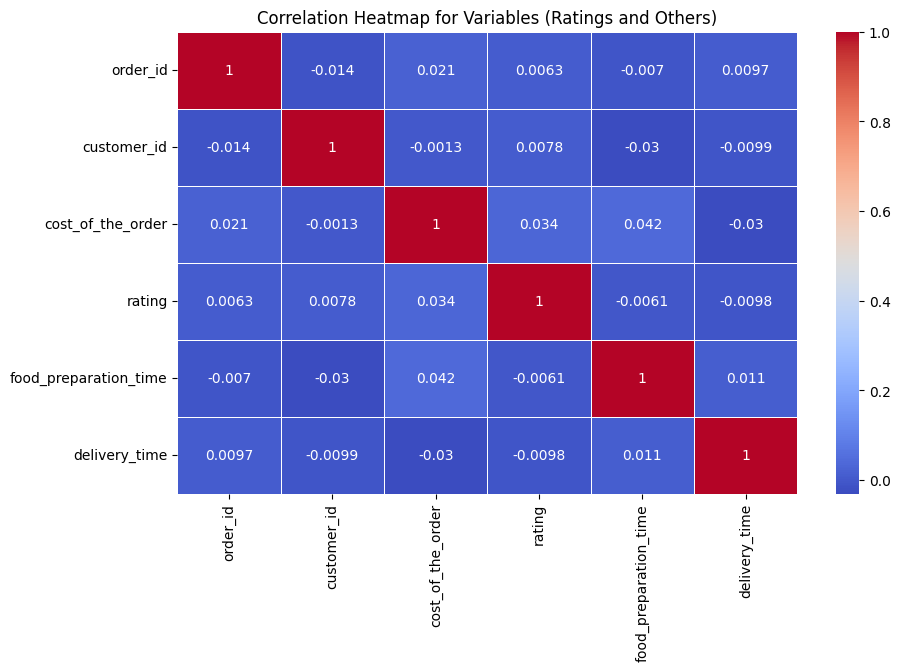

In [212]:
# Write the code here
# Create a temporary dataset where missing ratings are removed
temp_df = df[df['rating'] != 'Not Rated']

# Convert the 'rating' column to numeric (if necessary) by replacing categorical ratings with numerical values
temp_df['rating'] = pd.to_numeric(temp_df['rating'], errors='coerce')

# Select only numeric columns for correlation
numeric_cols = temp_df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numerical variables including ratings
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Variables (Ratings and Others)')
plt.show()

#### Note:
* This selects only the numeric columns from the dataset, which avoids the issue of non-numeric data (e.g., strings like restaurant names).
* I had to create a temporary dataset where the missing ratings were not there.

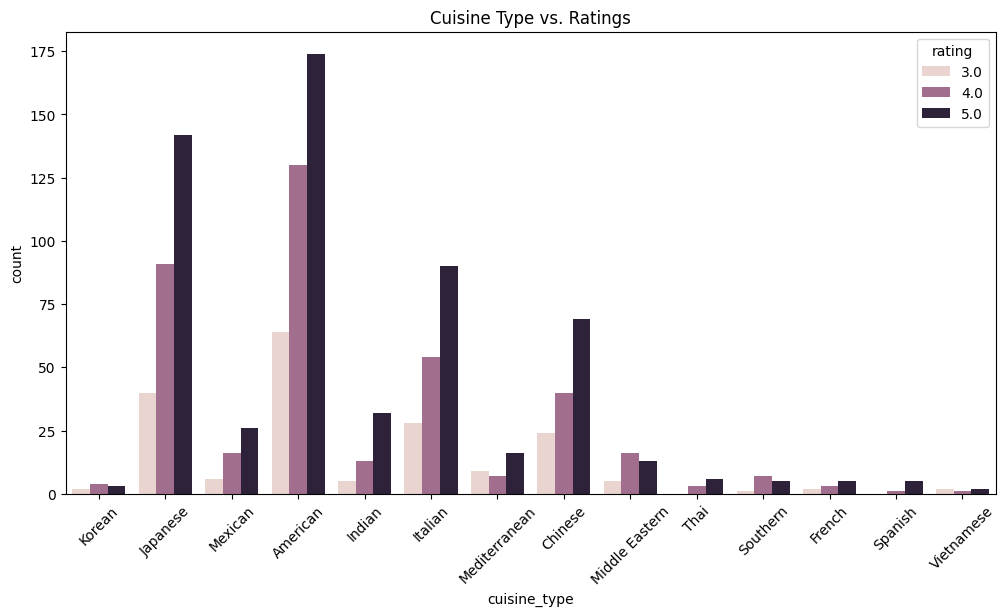

In [213]:
# Create a countplot to show the relationship between cuisine type and ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine_type', hue='rating', data=temp_df)
plt.xticks(rotation=45)
plt.title('Cuisine Type vs. Ratings')
plt.show()

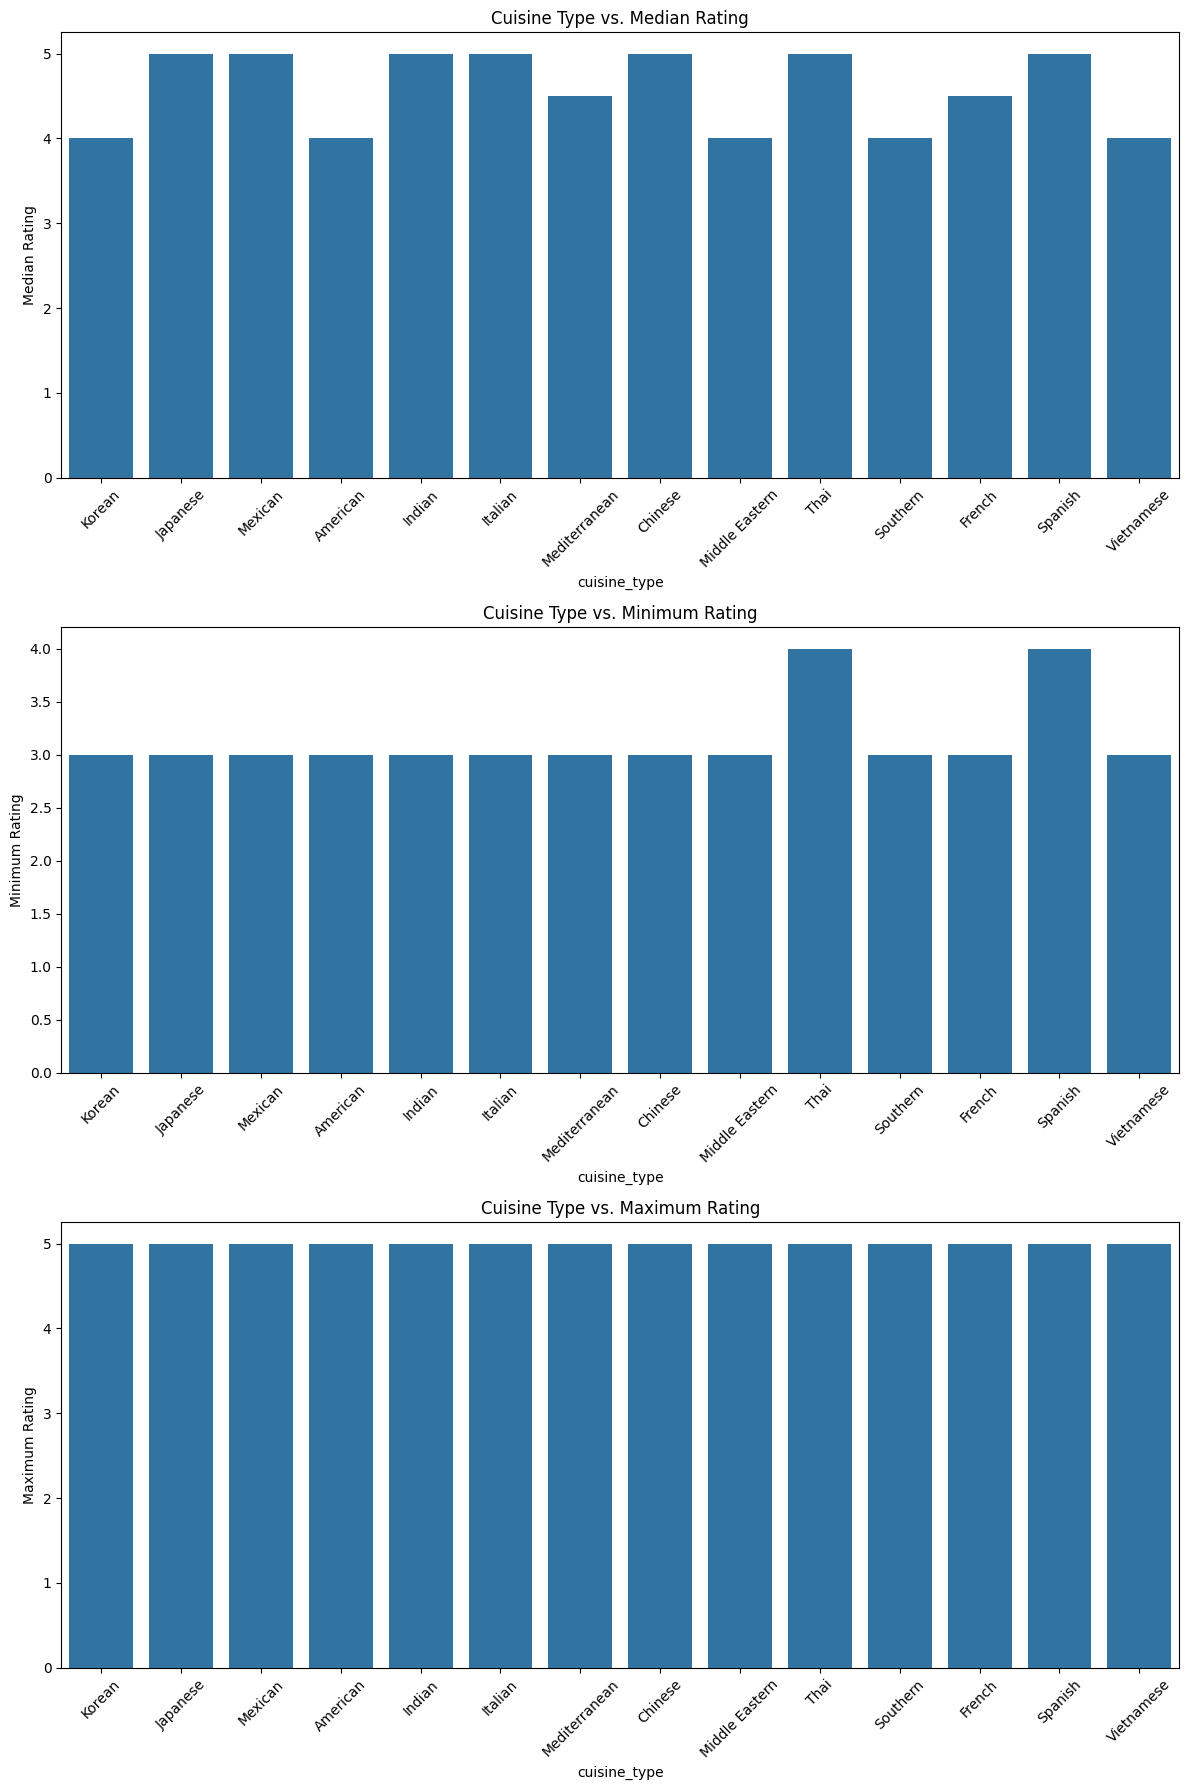

In [214]:
# Creating subplots to show cuisine_type with rating of median, min, and max
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Median Rating
sns.barplot(x='cuisine_type', y='rating', data=temp_df, estimator=np.median, errorbar=None, ax=axes[0])
axes[0].set_title('Cuisine Type vs. Median Rating')
axes[0].set_ylabel('Median Rating')
axes[0].tick_params(axis='x', rotation=45)

# 2. Minimum Rating
sns.barplot(x='cuisine_type', y='rating', data=temp_df, estimator=np.min, errorbar=None, ax=axes[1])
axes[1].set_title('Cuisine Type vs. Minimum Rating')
axes[1].set_ylabel('Minimum Rating')
axes[1].tick_params(axis='x', rotation=45)

# 3. Maximum Rating
sns.barplot(x='cuisine_type', y='rating', data=temp_df, estimator=np.max, errorbar=None, ax=axes[2])
axes[2].set_title('Cuisine Type vs. Maximum Rating')
axes[2].set_ylabel('Maximum Rating')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

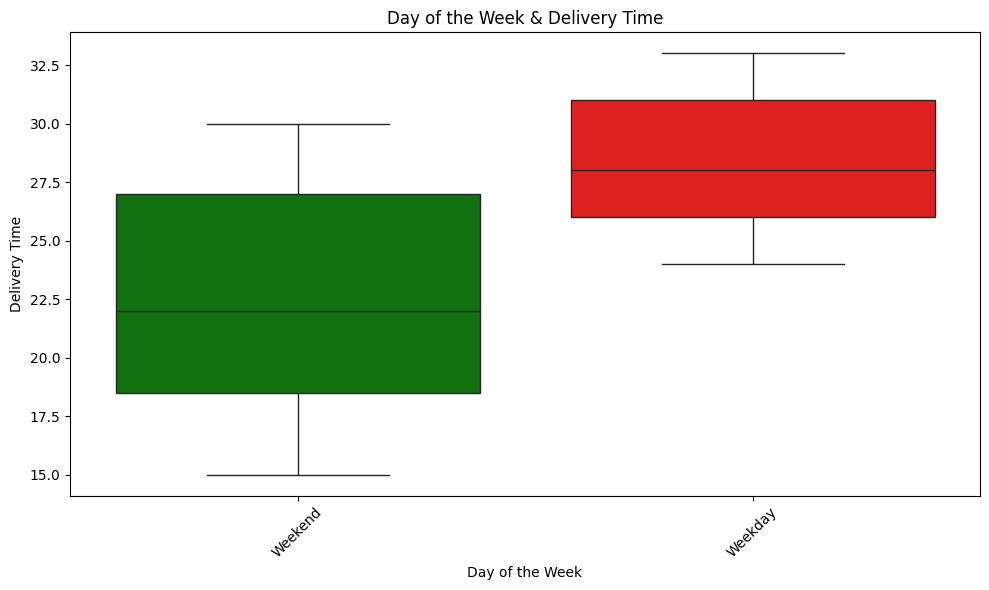

In [215]:
# Creating a boxplot to show the relationship between "day_of_the_week" and "delivery_time"
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', hue='day_of_the_week', data=df,
            palette={'Weekend': 'green', 'Weekday': 'red'}, legend=False)
plt.title('Day of the Week & Delivery Time')
plt.ylabel('Delivery Time')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [216]:
# Maximum Rating
sns.barplot(x='cuisine_type', y='rating', data=temp_df, estimator=np.max, errorbar=None, ax=axes[2])
axes[2].set_title('Cuisine Type vs. Maximum Rating')
axes[2].set_ylabel('Maximum Rating')
axes[2].tick_params(axis='x', rotation=45)

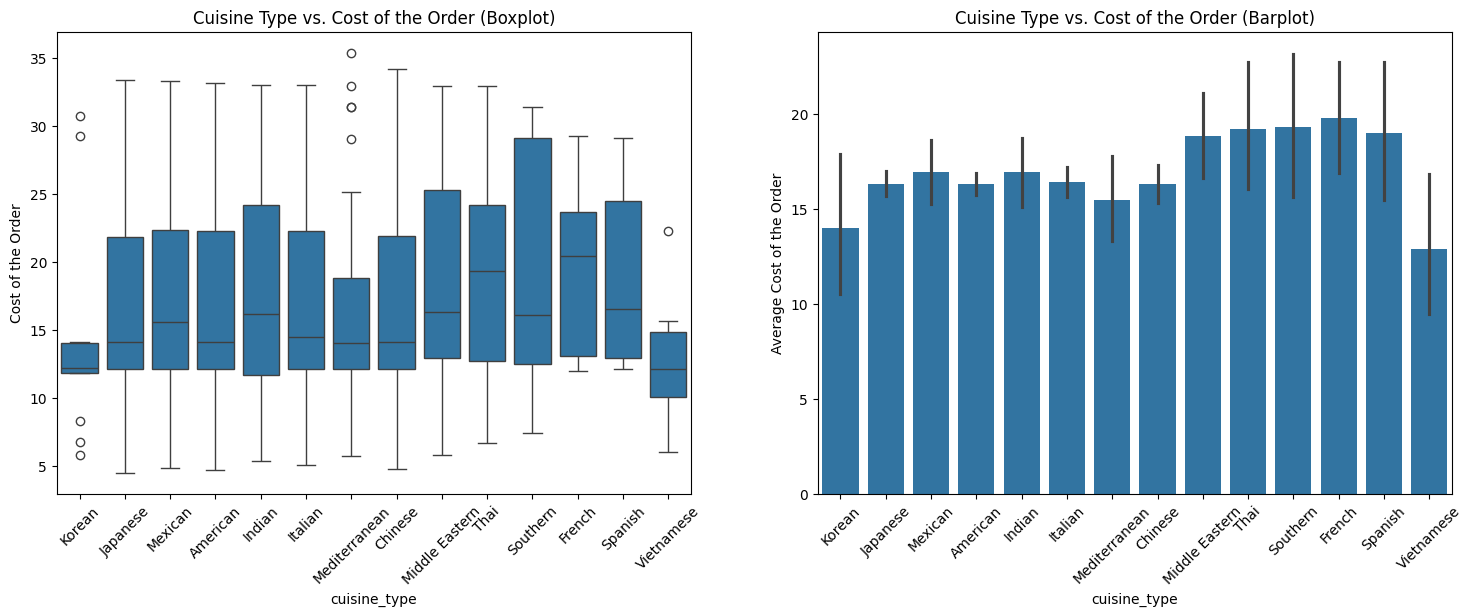

In [217]:
# Creating subplots to show cuisine_type with cost_of_the_order using boxplot and barplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Cuisine Type vs. Cost of the Order
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, ax=axes[0])
axes[0].set_title('Cuisine Type vs. Cost of the Order (Boxplot)')
axes[0].set_ylabel('Cost of the Order')
axes[0].tick_params(axis='x', rotation=45)

# Barplot for Cuisine Type vs. Cost of the Order
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df, estimator=np.mean, ax=axes[1])
axes[1].set_title('Cuisine Type vs. Cost of the Order (Barplot)')
axes[1].set_ylabel('Average Cost of the Order')
axes[1].tick_params(axis='x', rotation=45)

#### Observation:

The plots show the following for each cuisine type:
1.	Median
2.	Minimum
3.	Maximum

These show a comprehensive view of how customers rate different cuisines, ranging from the best to the worst experiences, and insights into the median customer satisfaction for each.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [218]:
# Write the code here
data.head()

# Remove missing ratings from the dataset
filtered_df = df[df['rating'] != 'Not Rated']
filtered_df['rating'] = pd.to_numeric(filtered_df['rating'], errors='coerce') # Convert 'rating' to numeric
restaurant_stats = filtered_df.groupby('restaurant_name')['rating'].agg(['count', 'mean']) # Group by restaurant name and calculate the count and average of ratings
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)] # Filter restaurants that have a rating count of more than 50 and an average rating greater than 4
eligible_restaurants

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:

The restaurants eligible for the promotional offer, based on having a rating count of more than 50 and an average rating greater than 4, are:

| Restaurant Name | Count | Mean |
| ------------- | ------------- | ------------- |
| Blue Ribbon Fried Chicken | 64 | 4.33 |
| Blue Ribbon Sushi | 73 | 4.22 |
| Shake Shack | 133 | 4.28 |
| The Meatball Shop | 84 | 4.51 |

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [219]:
# Write the code here
# Applying revenue calculation for 15% and 25% charges
df['revenue_25'] = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25
df['revenue_15'] = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15
total_revenue_25 = df['revenue_25'].sum() # Calculating the total revenue for 25%
total_revenue_15 = df['revenue_15'].sum() # Calculating the total revenue for 15%
total_net_revenue = total_revenue_25 + total_revenue_15 # Total net revenue
total_revenue_25, total_revenue_15, total_net_revenue

(3688.7275, 2477.5755, 6166.303)

#### Observations:

| 25% | 15% | Total |
| ----------- | ----------- | ----------- |
| 3688.73 USD | 2477.58 USD | 6166.30 USD |

* Net Revenue from 15% and 25% overages


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [220]:
# Write the code here
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [221]:
# Calculate the total time required (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_above_60_total = (df['total_time'] > 60).mean() * 100 # Calculate the percentage of orders that take more than 60 minutes for total time (preparation + delivery)
orders_above_60_total

10.537407797681771

#### Observations:

Approximate orders take more than 60 minutes in total, including both food preparation and delivery time: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [222]:
# Write the code here
# Grouping data by day_of_the_week and calculating the mean delivery time for weekdays and weekends
mean_delivery_time_weekdays_weekends = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery_time_weekdays_weekends

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


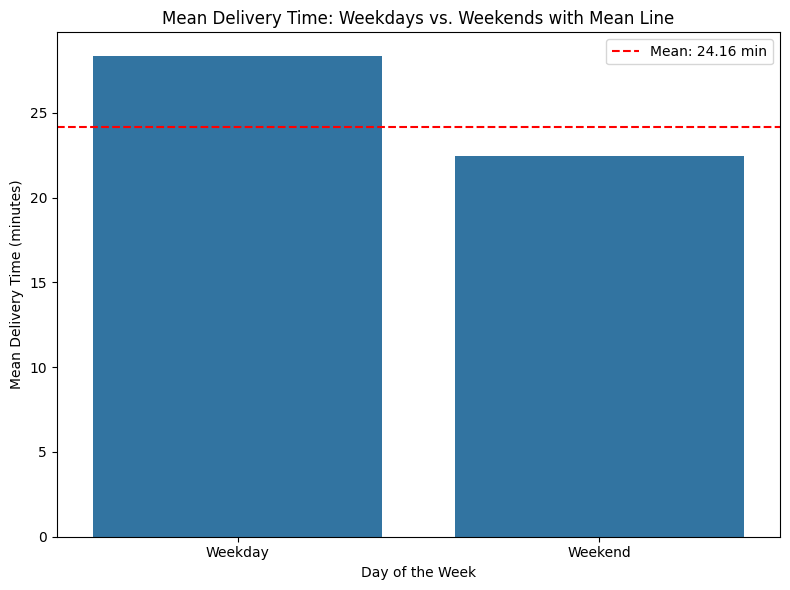

In [223]:
# Creating a barplot to show the mean delivery time for weekdays and weekends with a mean value line
plt.figure(figsize=(8, 6))

# Barplot for the mean delivery time
sns.barplot(x=mean_delivery_time_weekdays_weekends.index, y=mean_delivery_time_weekdays_weekends.values)

# Adding a horizontal line for the overall mean delivery time
overall_mean_delivery_time = df['delivery_time'].mean()
plt.axhline(overall_mean_delivery_time, color='red', linestyle='--', label=f'Mean: {overall_mean_delivery_time:.2f} min')

# Adding labels and title
plt.title('Mean Delivery Time: Weekdays vs. Weekends with Mean Line')
plt.ylabel('Mean Delivery Time (minutes)')
plt.xlabel('Day of the Week')

# Displaying the legend for the mean line
plt.legend()

plt.tight_layout()
plt.show()

#### Observations:

Weekday    28.340037
Weekend    22.470022

#### Weekend times are shorter than weekday times.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1.	Customer Satisfaction (Ratings):
	•	Higher-rated restaurants like The Meatball Shop and Shake Shack received an average rating greater than 4, indicating strong customer satisfaction.
	•	Cuisine types such as American and Japanese received high ratings, suggesting these cuisines are popular and well-received.
2.	Cost of Orders:
	•	The average cost of the order varies across cuisines. For example, Japanese cuisine tends to have higher average order costs, while American cuisine has a broader range of lower-cost orders.
	•	A significant portion of the orders fall within the mid-cost range, which presents an opportunity to increase revenue with promotional offers targeting high-cost orders.
3.	Delivery Time:
	•	Weekends see faster delivery times than weekdays, with an average of 22.47 minutes compared to 28.34 minutes on weekdays.
	•	About 10.54% of total orders take more than 60 minutes, which includes both preparation and delivery. Delays in delivery seem to impact customer satisfaction, as longer delivery times are correlated with lower ratings.
4.	Top-Performing Restaurants:
	•	Restaurants like Blue Ribbon Sushi, Shake Shack, and The Meatball Shop consistently receive positive feedback, high ratings, and a large number of orders, making them key contributors to business growth.
	•	The company’s total revenue from high-cost orders over $20 is significant, with a breakdown showing that 25% of revenue comes from such orders.

### Recommendations:

1.	Promotional Offers for High-Cost Orders:
	•	Since a large number of orders are in the mid-range cost category (between 5 USD and 20 USD), the company should offer targeted discounts or loyalty programs to incentivize customers to place higher-value orders above $20. This would boost revenue, particularly in the 25% charge category.
2.	Improve Delivery Times on Weekdays:
	•	Since weekday deliveries take longer on average, optimizing delivery efficiency on these days could improve customer satisfaction. Recommendations include:
	•	Expanding delivery staff during peak hours on weekdays.
	•	Implementing delivery time monitoring to identify bottlenecks and streamline operations.
3.	Focus on Popular and High-Rated Cuisines:
	•	American and Japanese cuisines are the most popular, and they also receive high customer ratings. The company should:
	•	Highlight these cuisines in marketing campaigns and promotional materials.
	•	Consider partnering with more restaurants that offer these popular cuisines to increase order volume and customer satisfaction.
4.	Address Long Preparation and Delivery Times:
	•	About 10% of orders take more than 60 minutes. To reduce this, the company could:
	•	Encourage restaurants to improve preparation times, possibly by setting maximum target times for different types of orders.
	•	Incentivize faster delivery for orders exceeding the 60-minute threshold to maintain high customer satisfaction.
5.	Leverage Customer Feedback:
	•	Encourage customers to provide feedback and ratings after delivery. Restaurants with consistently high ratings should be promoted more, while restaurants with lower ratings should receive actionable feedback on how to improve service (e.g., faster preparation, better quality control).

---